In [1]:
import os
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

import time
import glob
import tables as tb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import invisible_cities.icaro.mpl_functions as mpl
from matplotlib.pyplot import figure, show
from functools import reduce
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from itertools import product, combinations
%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14



2017-08-21 14:44:17


In [2]:
def draw_rectangle(pos, width, height, fill=False):

    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111, aspect='equal')
    ax1.add_patch(
    patches.Rectangle(
        pos,   # (x,y)
        width,          # width
        height,          # height
        fill=fill
        )
    )

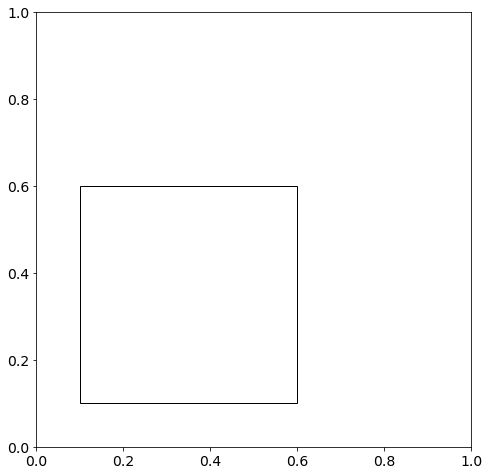

In [3]:
draw_rectangle((0.1, 0.1), 0.5, 0.5, fill=False)

In [5]:
def draw_cube():
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")

    # draw cube
    r = [-2, 2]
    for s, e in combinations(np.array(list(product(r, r, r))), 2):
        if np.sum(np.abs(s-e)) == r[1]-r[0]:
            print(*zip(s, e))
            ax.plot3D(*zip(s, e), color="b")




In [6]:
def draw_cube_around_point(x0, y0, z0, d = 1):
 

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")
    
    #ax3 = fig.add_subplot(223)
    ax.set_xlim(-50, 50)
    ax.set_ylim(-50, 0)
    ax.set_zlim3d(0, 50)



    x = (x0 - d, x0 + d)
    y = (y0 - d, y0 + d)
    z = (z0 - d, z0 + d)
    
    print(x,y,z)
    # draw cube

    for s, e in combinations(np.array(list(product(x, y, z))), 2):
        if np.sum(np.abs(s-e)) == 2*d:
            ax.plot3D(*zip(s, e), color="b")

(9, 11) (9, 11) (9, 11)


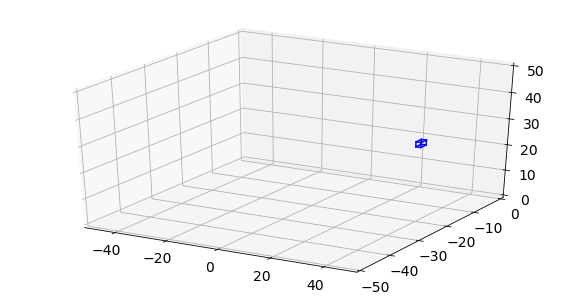

In [7]:
draw_cube_around_point(x0=10, y0=10, z0=10, d = 1)

In [8]:
class voxel:
    def __init__(self, x, y, z):
        self.X = x
        self.Y = y
        self.Z = z

In [9]:
def draw_cubes_around_set(voxels, d = 1):
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")
    
    #ax3 = fig.add_subplot(223)
    ax.set_xlim(-50, 50)
    ax.set_ylim(-50, 0)
    ax.set_zlim3d(0, 50)


    for v in voxels:
        x = (v.X - d, v.X + d)
        y = (v.Y - d, v.Y + d)
        z = (v.Z - d, v.Z + d)
    
        print(x,y,z)
        # draw cube

        for s, e in combinations(np.array(list(product(x, y, z))), 2):
            if np.sum(np.abs(s-e)) == 2*d:
                ax.plot3D(*zip(s, e), color="b")

(5, 15) (0, 10) (-2, 8)
(20, 30) (15, 25) (5, 15)


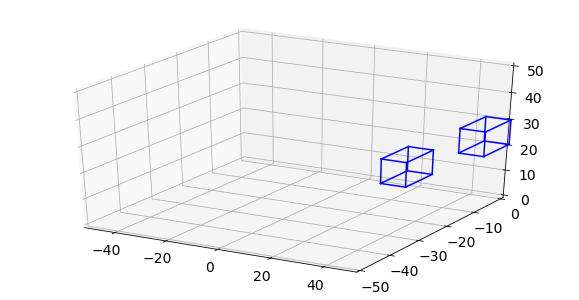

In [10]:
draw_cubes_around_set([voxel(10,5,3), voxel(25,20,10)], d = 5)

In [11]:
def draw_boxes_around_set(voxels, d = (1,1,1)):
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")
    
    #ax3 = fig.add_subplot(223)
    ax.set_xlim(-50, 50)
    ax.set_ylim(-50, 0)
    ax.set_zlim3d(0, 50)


    for v in voxels:
        x = (v.X - d.X, v.X + d.X)
        y = (v.Y - d.Y, v.Y + d.Y)
        z = (v.Z - d.Z, v.Z + d.Z)
    
        print(x,y,z)
        # draw cube

        for s, e in combinations(np.array(list(product(x, y, z))), 2):
            if np.sum(np.abs(s-e)) == 2*d.X or np.sum(np.abs(s-e)) == 2*d.Y or np.sum(np.abs(s-e)) == 2*d.Z:
                ax.plot3D(*zip(s, e), color="b")

(0, 20) (0, 10) (0, 6)
(15, 35) (15, 25) (7, 13)


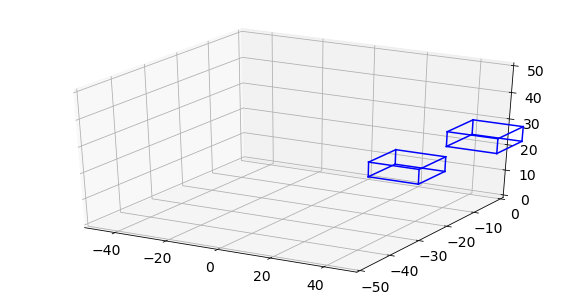

In [12]:
draw_boxes_around_set([voxel(10,5,3), voxel(25,20,10)], voxel(10,5,3))

AttributeError: module 'invisible_cities.icaro.mpl_functions' has no attribute 'cube'

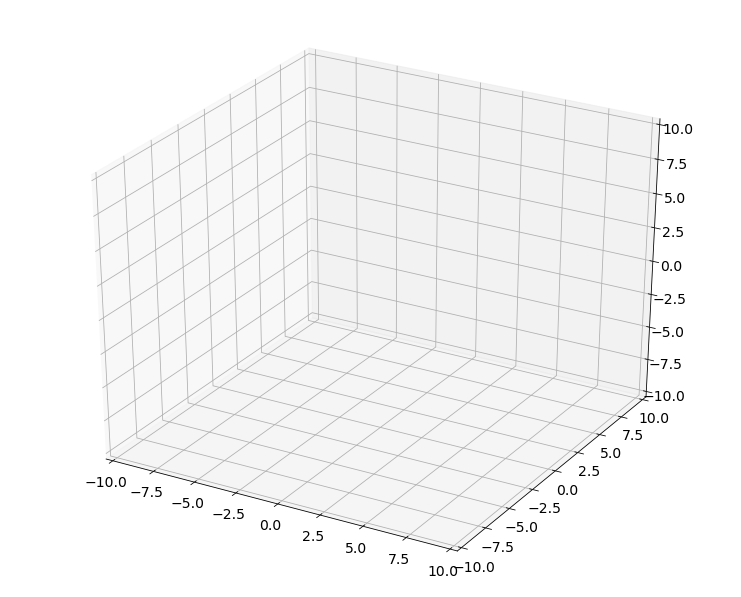

In [4]:

canvas = figure()
axes = Axes3D(canvas)
axes.set_xlim(-10, 10)
axes.set_ylim(-10, 10)
axes.set_zlim3d(-10, 10)


quads = mpl.cube(origin=(0.1,0.1,0.1), width=1, height=5, depth=10)

collection = Poly3DCollection(quads)


    
RGBA = mpl.make_color_map(np.linspace(0, 1.0), alpha=0.5)
collection.set_color(RGBA[10])
axes.add_collection3d(collection)

show()